In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

In [27]:
df = pd.read_csv('data/test.csv') 

X_test = df.drop(columns='price')
y_test = df['price']

In [28]:
model_names = ['LinearRegression', 'KNN', 'LinearSVR', 'RandomForest', 'MLPRegressor']
loaded_models = {}

for model_name in model_names:
    loaded_models[model_name] = joblib.load(f'trained_models/{model_name}.joblib')

eval_metrics = {
    'RMSE': {},
    'R2 Score': {},
}

for model_name, model in loaded_models.items():
    y_pred = np.round(model.predict(X_test), 2)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    eval_metrics['RMSE'][model_name] = rmse
    eval_metrics['R2 Score'][model_name] = r2

pd.DataFrame(eval_metrics)



,RMSE,R2 Score
LinearRegression,4.906051,0.685886
KNN,4.922100,0.683828
LinearSVR,5.129362,0.656640
RandomForest,4.611435,0.722480
MLPRegressor,4.591347,0.724892


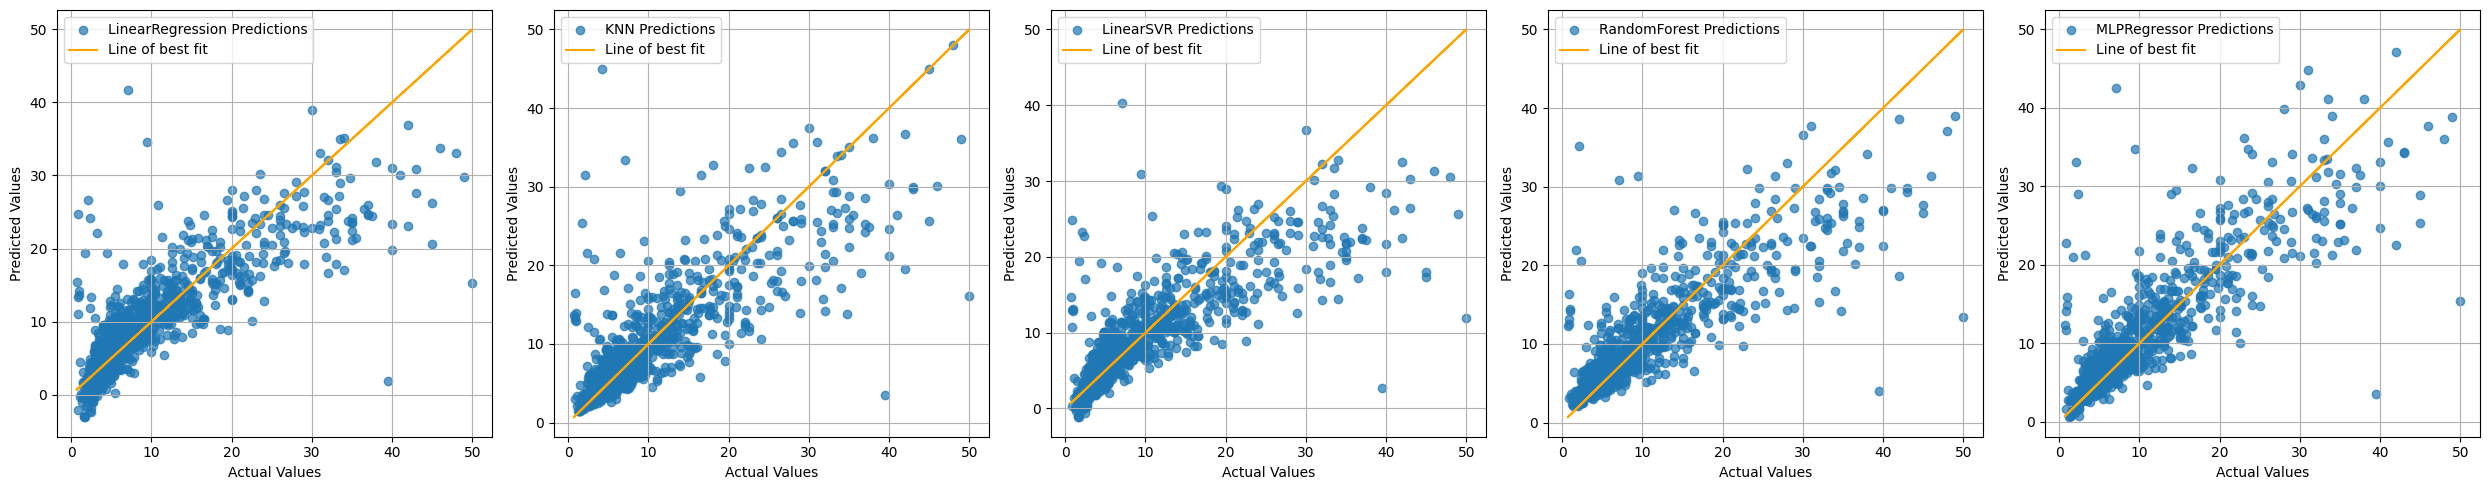

In [29]:
plt.figure(figsize=(25, 5))

for i, (model_name, model) in enumerate(loaded_models.items()):
    plt.subplot(1, len(loaded_models), i + 1)
    y_pred = model.predict(X_test)
    plt.scatter(y_test, y_pred, label=f'{model_name} Predictions', alpha=0.7)
    plt.plot(y_test, y_test, color='orange', label='Line of best fit')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.legend()
    plt.grid(True)

plt.tight_layout()